In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
raw = pd.read_excel('/Users/Batsone/GitKraken/datascience/Black Panther/data/ShapeofWater.xlsx')
raw.head()

,Date,Rank,Gross,% Change,Theaters,Per Theater,Total Gross,Days
0,2017-12-01,-,55468,NaN,2,27734,55468,1
1,2017-12-02,-,58788,0.06,2,29394,114256,2
2,2017-12-03,-,52308,-0.11,2,26154,166564,3
3,2017-12-04,-,16090,-0.69,2,8045,182654,4
4,2017-12-05,-,16808,0.04,2,8404,199462,5


In [32]:
df = raw[["Date","Gross"]]
df = df.rename(index=str, columns = {"Date":"ds", "Gross":"y"})

In [33]:
df['real_y'] = df['y']

df['y'] = np.log(df['y'])

In [34]:
from fbprophet import Prophet

In [35]:
m = Prophet()
m.fit(df);

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future_data = m.make_future_dataframe(periods=21)

In [37]:
forecast_data = m.predict(future_data)

In [38]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
107,2018-03-18,12.029089,11.441185,12.622261
108,2018-03-19,11.317048,10.704305,11.926273
109,2018-03-20,11.262346,10.650573,11.906606
110,2018-03-21,11.121333,10.482407,11.797241
111,2018-03-22,10.896912,10.213495,11.609953


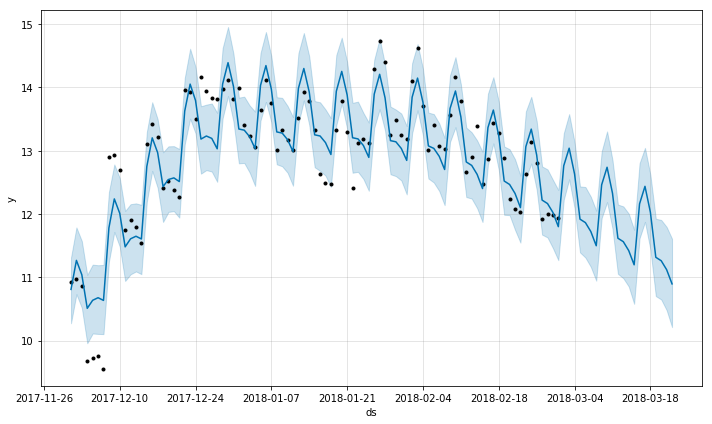

In [39]:
m.plot(forecast_data);

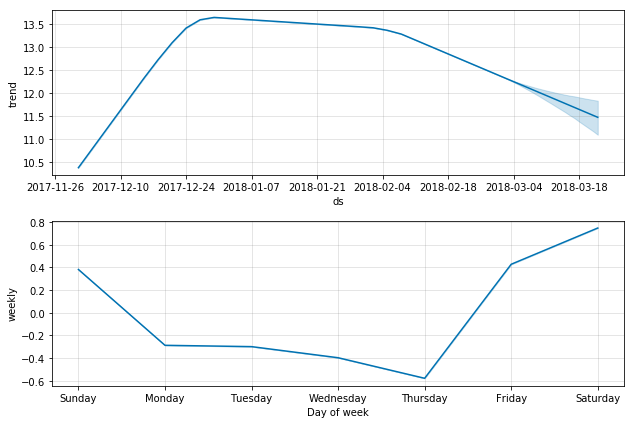

In [40]:
m.plot_components(forecast_data);

In [41]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

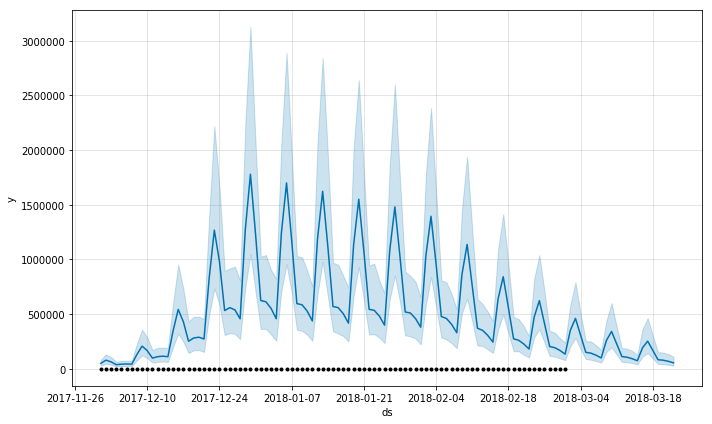

In [42]:
m.plot(forecast_data_orig);

In [44]:
forecast_data_orig.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yhat
0,2017-12-01,10.381199,10.381199,10.381199,28986.561848,81902.655489,0.428464,0.428464,0.428464,0.428464,0.428464,0.428464,0.428464,0.428464,0.428464,49496.775810
1,2017-12-02,10.519936,10.519936,10.519936,45929.853058,131770.267782,0.748274,0.748274,0.748274,0.748274,0.748274,0.748274,0.748274,0.748274,0.748274,78292.737048
2,2017-12-03,10.658674,10.658674,10.658674,36937.359558,106238.521652,0.382335,0.382335,0.382335,0.382335,0.382335,0.382335,0.382335,0.382335,0.382335,62380.533615
3,2017-12-04,10.797411,10.797411,10.797411,21135.554921,62239.350669,-0.286676,-0.286676,-0.286676,-0.286676,-0.286676,-0.286676,-0.286676,-0.286676,-0.286676,36707.463907
4,2017-12-05,10.936148,10.936148,10.936148,24660.724864,73203.230679,-0.298347,-0.298347,-0.298347,-0.298347,-0.298347,-0.298347,-0.298347,-0.298347,-0.298347,41681.040755


In [43]:
forecast_data_orig['y_log']=forecast_data_orig['y'] #copy the log-transformed data to another column
forecast_data_orig['y']=forecast_data_orig['real_y'] #copy the original data to 'y'

KeyError: 'y'

In [ ]:
m.plot(forecast_data);

In [ ]:
df['y']